In [482]:
import numpy as np
import matplotlib.pyplot as plt

class BankAccount:
    """
    `BankAccount` class for managing a bank account but also blocking an existing one.
    The bank account name can only be opened either at ABank, BBank or CBank.
    At ABank, starting balance of 100 € is offered, at BBank 50 € and CBank 25 €.

    Methods: See docstring on each method for detailed informations.
        get_status: 
        get_balance: 
        receive_money:
        send_money:
        overiew:
        block:
        reactivate: 

    Attributes:
        bank_name (str): one of [ABank, BBank, CBank]
        iban (str): Alphanumeric (first 2 letters of bank name + 6 random digits)
        owner (str): Name of account owner
        status(str): One of [active, blocked]

    Dependencies: numpy and matplotlib
    """

    def __init__(self, bank_name, account_owner):

        self.__available_banks = ['ABank','BBank', 'CBank']

        # Handling wrong bank name entry
        if bank_name not in self.__available_banks:
            raise ValueError(f'Bank name must be one of {self.__available_banks}')


        self.__status = 'active'

        self.bank_name = bank_name

        self.owner = account_owner

        iban = self.bank_name[:2] + ''.join( [str(number) for number in np.random.randint(9, size=6)] )
        self.iban = iban

        # dataset for storing transactions
        self.__ins_outs = {'amount_received': [], 
                           'amount_sent': []
                           }
        
        # start balance (will be updated when money is received or sent)
        if self.bank_name == self.__available_banks[0]:
            self.__balance = 100.00
        elif self.bank_name == self.__available_banks[1]:
            self.__balance = 50.00
        else:
            self.__balance = 25.00






    

    # GETTERS
    # get status
    def get_status(self):
        """
        No input, return the current account status (str). One of ['active', 'blocked'].
        """
        return self.__status


    # get balance
    def get_balance(self):
        """
        No inputs, return the balance as float. Only works for an active account!
        """
        if self.__status == 'active':
            return self.__balance
        else:
            raise ConnectionRefusedError(self.__error_message)



    # get account report
    def overview(self, chart = False):
        """
        Give information about account details such as IBAN, name of account owner, bank name as well as balance.
        If input is `True`, a graph showing money transactions (ins and outs ) is included in the account overview.
        Only works if account is active!
        """

        if self.__status == 'active':
            print("-" * 100)
            print(f'Welcome { self.owner }', '\t' * 7, f'BALANCE:  { round(self.__balance, 2) } €')
            print(f'{ self.iban } \n{ self.bank_name }')
            print("-" * 100)
            

            if chart:
                plt.plot(self.__ins_outs['amount_received'], c = 'green', linewidth = 2, label = 'amount_received')

                plt.plot(self.__ins_outs['amount_sent'], c = 'red', linewidth = 2, label = 'amount_sent')

                plt.legend()

                plt.title('Transactions')
                plt.xlabel('Order of transaction')
                plt.ylabel('Amount (EUR)')

                plt.show()


        
        else:
            raise ConnectionRefusedError(self.__error_message)
        
        
        

    


    # SETTERS
    # blocking account 
    def block(self):
        """
        No input. Set the account status to 'blocked' and create an error message that is displayed when trying to access
        following methods: get_balance, receive_money, send_money and overiew.
        """
        self.__error_message = 'Account is blocked!!! Another Account muss be opened or the current account reactivated.'
        self.__status = 'blocked'



    # reactivate account
    def reactivate(self):
        """
        No input. Reset account status to 'active' when the account is blocked and display a confirmation message
        """
        if self.__status == 'blocked':
            self.__status = 'active'
            print( f"Account {self.iban} is reactivated." )

        else:
            print( f"Account {self.iban} already active !")



    # outgoing money
    def send_money(self, amount):
        """
        Input is the amount of money (float | integer) to deposit in the account. Print a confirmation message.
        Add amount to self.__ins_outs database and update balance. Only works if account is active!

        """
        if self.__status == 'active':
            print(f"{amount} € sent")

            # update database
            self.__ins_outs['amount_sent'].append(amount)

            # update balance
            self.__balance -= amount 
        else:
            raise ConnectionRefusedError(self.__error_message)



    # incoming money
    def receive_money(self, amount):
        """
        Input is the amount of money (float | integer) to deposit in the account. Print a confirmation message.
        Add amount to self.__ins_outs database and update balance. Only works if account is active!

        """
        if self.__status == 'active':
            print(f"{amount} € received")

            # update database
            self.__ins_outs['amount_received'].append(amount)

            # update balance
            self.__balance += amount 
        else:
            raise ConnectionRefusedError(self.__error_message)



In [483]:
# instantiation
theo_account = BankAccount('ABank','Theo')

# accessing attributes and getting account status

print( theo_account.owner )
print( theo_account.bank_name )
print( theo_account.iban )
print( theo_account.get_status() ) 
print( theo_account.get_balance() )

Theo
ABank
AB782531
active
100.0


In [484]:
# receive money
money_received = [50, 100, 10, 25, 15]
for amount in money_received:
    theo_account.receive_money(amount)
    print( theo_account.get_balance() )


50 € received
150.0
100 € received
250.0
10 € received
260.0
25 € received
285.0
15 € received
300.0


In [485]:
# sent/transfer money
money_sent = [0, 50, 10, 40, 100]
for amount in money_sent:
    theo_account.send_money(amount)
    print( theo_account.get_balance() )


0 € sent
300.0
50 € sent
250.0
10 € sent
240.0
40 € sent
200.0
100 € sent
100.0


----------------------------------------------------------------------------------------------------
Welcome Theo 							 BALANCE:  100.0 €
AB782531 
ABank
----------------------------------------------------------------------------------------------------


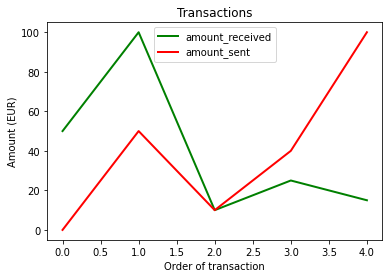

In [486]:
# report
theo_account.overview(chart=True)

In [487]:
# block method
theo_account.block()

# getting account status
print( theo_account.get_status() )

# trying to get access to account balance when account is blocked.
theo_account.get_balance()


blocked


ConnectionRefusedError: Account is blocked!!! Another Account muss be opened or the current account reactivated.

In [488]:
# reactivating account and trying again to get  balance
theo_account.reactivate()
print( theo_account.get_status() )
print( theo_account.get_balance() )


Account AB782531 is reactivated.
active
100.0
